# Hierarchical clustering 
1. A clustering mechanism to find patterns from submitted topics or requests.
2. A hierarchical clustering method that can produce a hierarchical dendrogram of topics submitted over a period of time.

In [1]:
import pandas as pd, numpy as np, re, os, sys, mpld3, matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
mpld3.enable_notebook() # Enable to show mpld3

# from sklearn.manifold import MDS
# from sklearn.cluster import AgglomerativeClustering
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics.pairwise import cosine_similarity

import nltk
from nltk.stem.snowball import SnowballStemmer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
stopwords = nltk.corpus.stopwords.words('english')
stemmer = SnowballStemmer('english')

import aux_functions as aux

# Error : maximum recursion depth exceeded while calling a Python object
sys.setrecursionlimit(10**9)

pd.options.display.max_rows=None
pd.options.display.max_colwidth=1000
pd.set_option('display.float_format', lambda x: '%.3f'%x)

# Local run
filepath = 'C:/Users/gemin/4B_Cap_data'

# Google Colab
# from google.colab import drive
# drive.mount('/content/drive')
# # os.chdir('/content/drive/My Drive/Colab Notebooks/')
# cwd = os.getcwd()
# filepaht = cwd + '/Datasets'

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gemin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gemin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\gemin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gemin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gemin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Setting seed, label, feature, time period

In [65]:
rand_state = 42
label = 'section_clean'
feature = 'title_clean'
# feature = 'article_clean'
# feature = 'pos_tagged'

## Year, Month
year = '2020'
time_period = 'month'

# Creates a subcorpus

In [55]:
%%time
sample = pd.read_csv(filepath+'/corpus_' + year +'.csv', low_memory=False
#                        , nrows=100000
                      )

Wall time: 7.8 s


In [56]:
print('Year', year, ' Time period', time_period, ' Label', label, ' Feature', feature, sep=' : ')
sample.isnull().sum()

Year : 2020 :  Time period : month :  Label : section_clean :  Feature : pos_tagged


year             0
month            0
day              0
section_clean    0
title_clean      0
article_clean    0
dtype: int64

In [57]:
sample.section_clean.value_counts(normalize=True).sort_values(ascending=False)

none                                      0.412
healthcare                                0.072
world news                                0.058
wires                                     0.058
business news                             0.049
politics                                  0.023
us                                        0.019
bonds news                                0.015
market news                               0.012
sports news                               0.012
company news                              0.012
financials                                0.011
technology news                           0.009
business                                  0.008
world                                     0.008
tech                                      0.008
health news                               0.008
commodities                               0.007
opinion                                   0.007
asia                                      0.006
environment                             

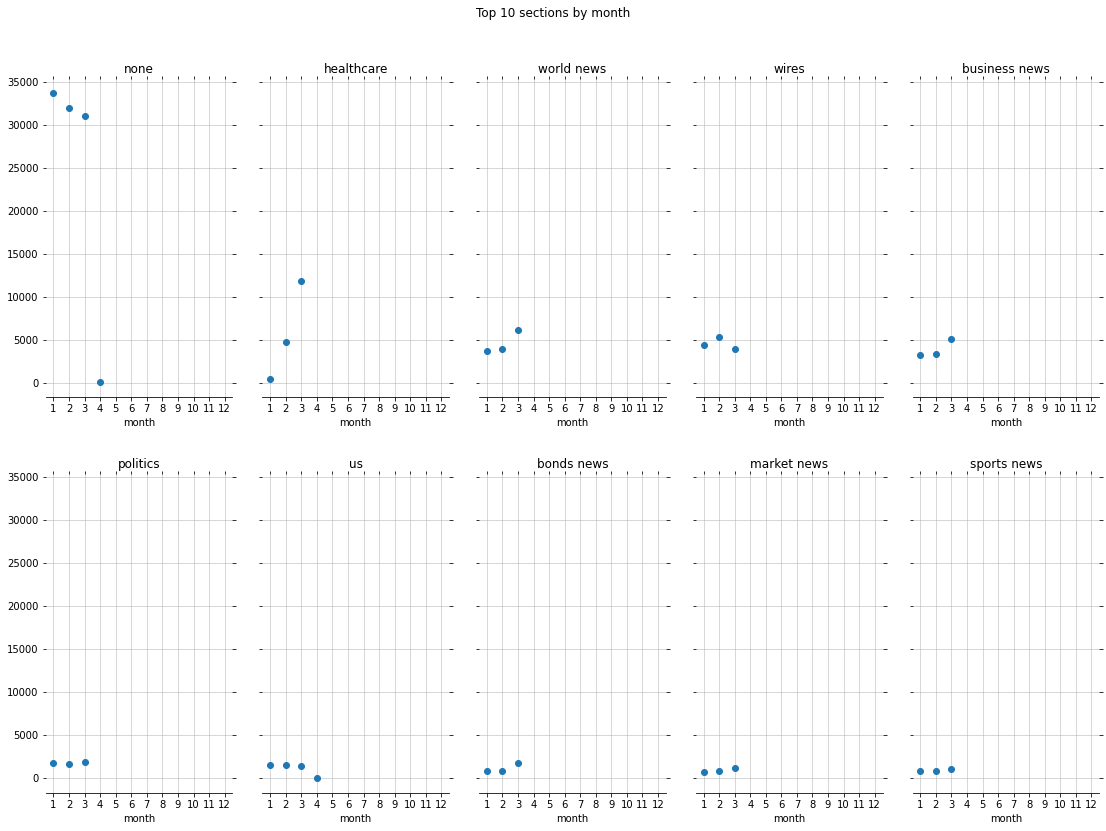

In [58]:
aux._plot_freq(sample)

In [59]:
subset_cat = ['health','tech','science','engineering','medical']

sub_corpus = aux.eda_subcorpus(sample, subset_cat, label, year, time_period)
sub_corpus.head(5)

Category - HEALTH TECH SCIENCE ENGINEERING MEDICAL :  26123
Subcorpus Dim : (26123, 6)
Counts by month for year 2020
month
1     2916
2     7386
3    15819
4        2
Name: section_clean, dtype: int64


,year,month,day,section_clean,title_clean,article_clean
151,2020,1,1,science,meteor showers in that will light up night skies,all year long earth passes through streams of cosmic debris here list of major meteor showers and how to spot one all year long as earth revolves around the sun it passes through streams of cosmic debris the resulting meteor showers can light up night skies from dusk to dawn and if you re lucky you might be able to catch one if you spot meteor shower what you re really seeing is the leftovers of icy comets crashing into earth atmosphere comets are sort of like dirty snowballs as they travel through the solar system they leave behind dusty trail of rocks and ice that lingers in space long after they leave when earth passes through these cascades of comet waste the bits of debris which can be as small as grains of sand pierce the sky at such speeds that they burst creating celestial fireworks display sign up to get reminders for space and astronomy events on your calendar general rule of thumb with meteor showers you are never watching the earth cross into remnants from comet most re...
165,2020,1,1,science,rocket launches trips to mars and more space and astronomy events,if you follow space news and astronomy the past year offered no shortage of highlights astronomers provided humanity first glimpse of black hole china landed on the moon far side and the th anniversary of the apollo moon landing inspired us to look ahead to our future in space the year to come will be no less eventful no fewer than four missions to mars could leave earth this summer nasa may finally launch astronauts into orbit aboard capsules built by spacex and boeing we expect to learn more secrets about the interstellar comet borisov and private companies are working to demonstrate new abilities in space however much you love space and astronomy it can be challenging to keep up with the latest news in orbit and beyond that why we ve put dates for some of these events on the times astronomy and space calendar which has been updated for subscribe on your personal digital calendar to be automatically synced with our updates all year long we promise not to collect any personal info...
169,2020,1,1,technology,the tech that will invade our lives in,tech fix from smart homes to ultrafast wireless speeds here what to watch the made one thing clear tech is everywhere in life tech is in our homes with thermostats that heat up our residences before we walk through the door it in our cars with safety features that warn us about vehicles in adjacent lanes it on our television sets where many of us are streaming shows and movies through apps we even wear it on ourselves in the form of wristwatches that monitor our health in and the coming decade these trends are likely to gather momentum they will also be on display next week at ces an enormous consumer electronics trade show in las vegas that typically serves as window into the year hottest tech developments at the show next generation cellular technology known as which delivers data at mind boggling speeds is expected to take center stage as one of the most important topics we are also likely to see the evolution of smart homes with internet connected appliances such as refrigerato...
2139,2020,1,2,health,these vaginas evolved to fight the penis not accommodate it,most male birds don have penises they mate using an opening called cloaca derived from the latin word for sewer it cavity inside bird anus that one stop shop for the digestive urinary and reproductive tracts when birds mate the male and female cloaca touch the male releases sperm and it enters the female body it referred to somewhat romantically as cloacal kiss brennan was observing pair of great tinamous brown chicken like birds with small heads that live in the costa rican forest instead of just the subtle and brief cloacal kiss the male bird grabbed the female by the neck then the two birds started walking around still attached as i

In [60]:
sub_corpus[sub_corpus.title_clean == 'none'].count()

year             1
month            1
day              1
section_clean    1
title_clean      1
article_clean    1
dtype: int64

In [61]:
sub_corpus.drop_duplicates(subset=['title_clean'], inplace=True)

In [62]:
sub_corpus.drop(sub_corpus[sub_corpus.title_clean == 'none'].index, inplace=True)

In [66]:
%%time
def _tagPos(text):
    sentence = nltk.sent_tokenize(text)
    for sent in sentence:
        postags = nltk.pos_tag(nltk.word_tokenize(sent))
        return ' '.join([p[0] for p in postags if p[1] in ('NN','NNS','JJ','JJR','JJS','NNP','NNPS'
#                                                            ,'VB','VBG','VBD','VBP','VBN','VBZ'\
                                                          )])

sub_corpus['pos_tagged'] = sub_corpus[feature].apply(lambda x: _tagPos(x))

Wall time: 29.4 s


In [67]:
sub_corpus.head()

,year,month,day,section_clean,title_clean,article_clean,pos_tagged
151,2020,1,1,science,meteor showers in that will light up night skies,all year long earth passes through streams of cosmic debris here list of major meteor showers and how to spot one all year long as earth revolves around the sun it passes through streams of cosmic debris the resulting meteor showers can light up night skies from dusk to dawn and if you re lucky you might be able to catch one if you spot meteor shower what you re really seeing is the leftovers of icy comets crashing into earth atmosphere comets are sort of like dirty snowballs as they travel through the solar system they leave behind dusty trail of rocks and ice that lingers in space long after they leave when earth passes through these cascades of comet waste the bits of debris which can be as small as grains of sand pierce the sky at such speeds that they burst creating celestial fireworks display sign up to get reminders for space and astronomy events on your calendar general rule of thumb with meteor showers you are never watching the earth cross into remnants from comet most re...,meteor showers night skies
165,2020,1,1,science,rocket launches trips to mars and more space and astronomy events,if you follow space news and astronomy the past year offered no shortage of highlights astronomers provided humanity first glimpse of black hole china landed on the moon far side and the th anniversary of the apollo moon landing inspired us to look ahead to our future in space the year to come will be no less eventful no fewer than four missions to mars could leave earth this summer nasa may finally launch astronauts into orbit aboard capsules built by spacex and boeing we expect to learn more secrets about the interstellar comet borisov and private companies are working to demonstrate new abilities in space however much you love space and astronomy it can be challenging to keep up with the latest news in orbit and beyond that why we ve put dates for some of these events on the times astronomy and space calendar which has been updated for subscribe on your personal digital calendar to be automatically synced with our updates all year long we promise not to collect any personal info...,rocket trips mars more space astronomy events
169,2020,1,1,technology,the tech that will invade our lives in,tech fix from smart homes to ultrafast wireless speeds here what to watch the made one thing clear tech is everywhere in life tech is in our homes with thermostats that heat up our residences before we walk through the door it in our cars with safety features that warn us about vehicles in adjacent lanes it on our television sets where many of us are streaming shows and movies through apps we even wear it on ourselves in the form of wristwatches that monitor our health in and the coming decade these trends are likely to gather momentum they will also be on display next week at ces an enormous consumer electronics trade show in las vegas that typically serves as window into the year hottest tech developments at the show next generation cellular technology known as which delivers data at mind boggling speeds is expected to take center stage as one of the most important topics we are also likely to see the evolution of smart homes with internet connected appliances such as refrigerato...,tech lives
2139,2020,1,2,health,these vaginas evolved to fight the penis not accommodate it,most male birds don have penises they mate using an opening called cloaca derived from the latin word for sewer it cavity inside bird anus that one stop shop for the digestive urinary and reproductive tracts when birds mate the male and female cloaca touch the male releases sperm and it enters the female body it referred to somewhat romantically as cloacal kiss brennan was observing pair of great tinamous brown chicken like birds with small heads that live in the costa rican forest instead of just the subtle and brief cloacal kiss the male bi

In [68]:
print(sub_corpus['title_clean'].isnull().sum())
print(sub_corpus['article_clean'].isnull().sum())
print(sub_corpus['section_clean'].isnull().sum())

0
0
0


In [69]:
%%time
sub_corpus['num_words_per_title'] = sub_corpus['title_clean'].apply(lambda x: len(x.split()))
print(sub_corpus['num_words_per_title'].describe())

sub_corpus['num_words_per_article'] = sub_corpus['article_clean'].apply(lambda x: len(x.split()))
print(sub_corpus['num_words_per_article'].describe())

sub_corpus['num_words_per_pos'] = sub_corpus['pos_tagged'].apply(lambda x: len(x.split()))
print(sub_corpus['num_words_per_pos'].describe())

count   23854.000
mean       10.905
std         3.106
min         1.000
25%         9.000
50%        10.000
75%        12.000
max        29.000
Name: num_words_per_title, dtype: float64
count   23854.000
mean      256.791
std       426.841
min         1.000
25%        46.000
50%        89.000
75%       315.000
max      8291.000
Name: num_words_per_article, dtype: float64
count   23854.000
mean        6.793
std         2.196
min         0.000
25%         5.000
50%         7.000
75%         8.000
max        20.000
Name: num_words_per_pos, dtype: float64
Wall time: 625 ms


In [70]:
%%time
median_words_per_sample1 = np.median(sub_corpus['num_words_per_title'])
sw_ratio1 = sub_corpus.shape[0] / median_words_per_sample1
print('Number of Titles / Number of Words per Title Ratio: {:.2f}'.format(sw_ratio1))

median_words_per_sample2 = np.median(sub_corpus['num_words_per_article'])
sw_ratio2 = sub_corpus.shape[0] / median_words_per_sample2
print('Number of Articles / Number of Words per Article Ratio: {:.2f}'.format(sw_ratio2))

median_words_per_sample3 = np.median(sub_corpus['num_words_per_pos'])
sw_ratio3 = sub_corpus.shape[0] / median_words_per_sample3
print('Number of POS tagged / Number of Words per POS tagged Ratio: {:.2f}'.format(sw_ratio3))

Number of Titles / Number of Words per Title Ratio: 2385.40
Number of Articles / Number of Words per Article Ratio: 268.02
Number of POS tagged / Number of Words per POS tagged Ratio: 3407.71
Wall time: 2.33 ms


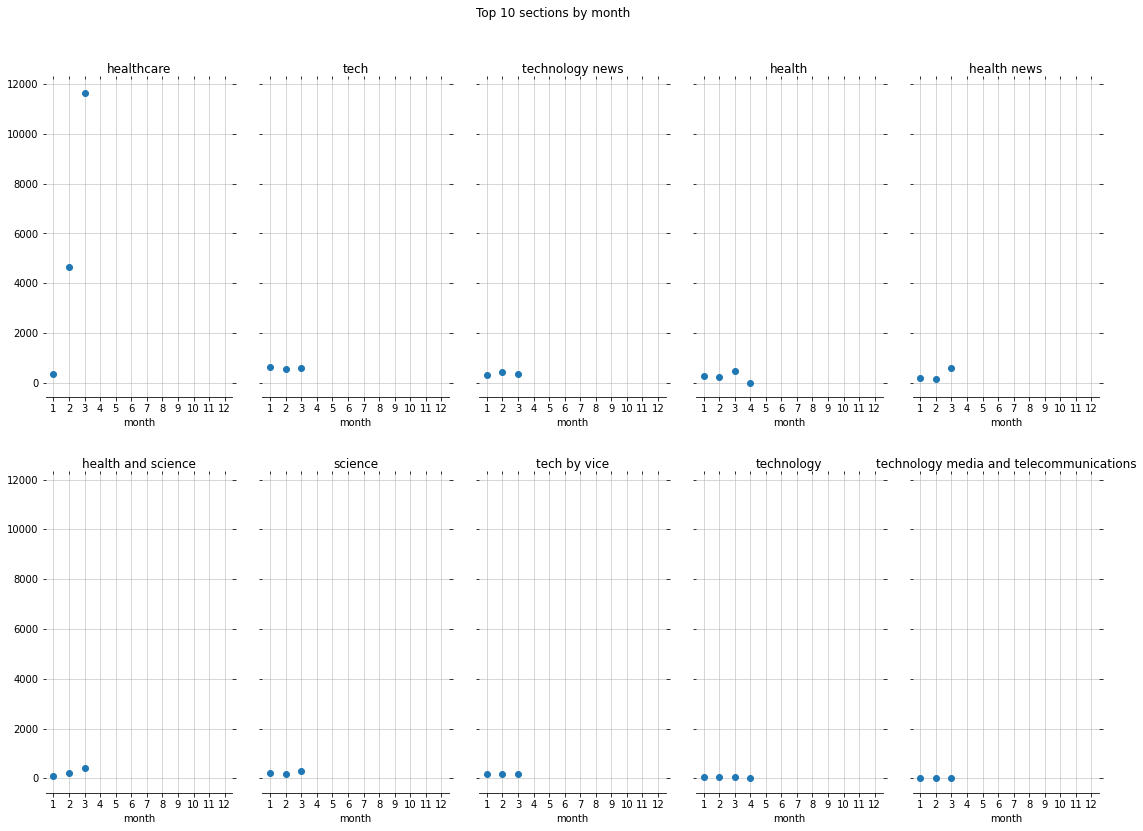

Wall time: 1.53 s


In [71]:
%%time
aux._plot_freq(sub_corpus)

# Tf-idf and document similarity

In [72]:
feature = 'pos_tagged'
times = [1]

_raw_text = sub_corpus[sub_corpus[time_period].isin(times)][feature]
_labels = sub_corpus[sub_corpus[time_period].isin(times)][label].values

In [73]:
%%time
cos_sim, tfidf_matrix = aux.tfidf_vectorizer(_raw_text, max_df=.5, min_df=.025)

(2448, 15)
Feature names up to 20 :  ['amazon' 'appl' 'case' 'china' 'coronavirus' 'facebook' 'health' 'huawei'
 'new' 'outbreak' 'uk' 'updat' 'virus' 'wuhan' 'year']
cosine_similarity dim :  (2448, 2448)
cosine_similarity matrix :  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Wall time: 891 ms


In [83]:
print(cos_sim.mean())
print(cos_sim.max())
print(cos_sim.std())

0.006114935761886454
1.0
0.07795860005486532


# Hierarchical document clustering - Dendrogram

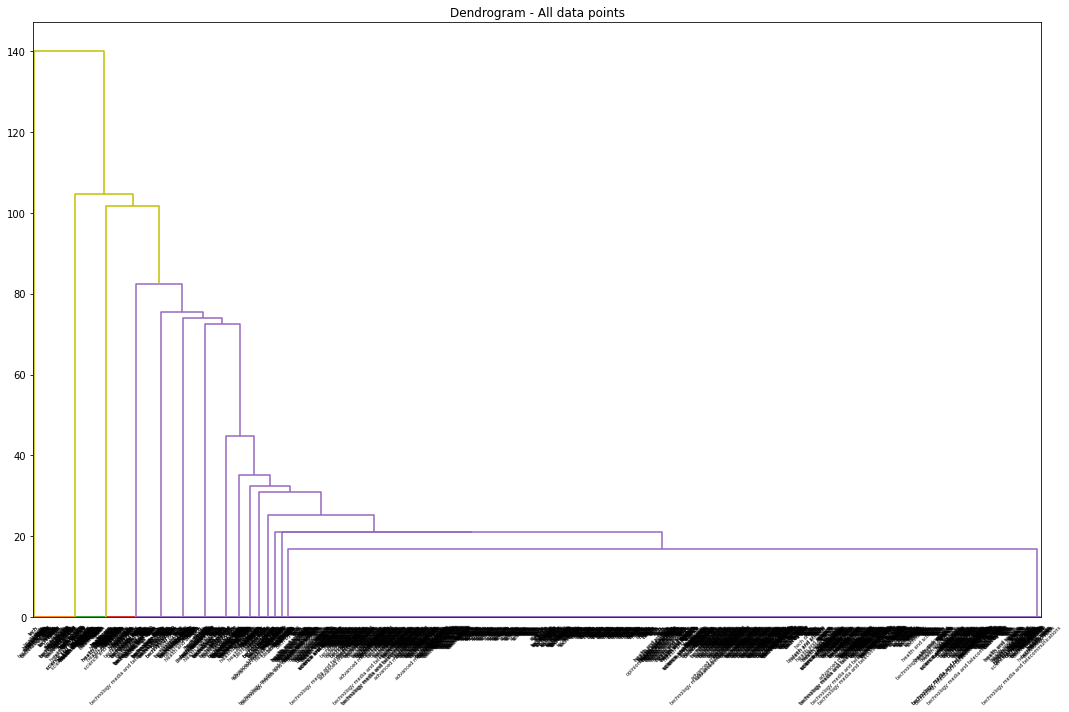

Wall time: 1min 11s


In [75]:
%%time
aux._plot_dendrogram(cos_sim, _labels, zoom_in=False)

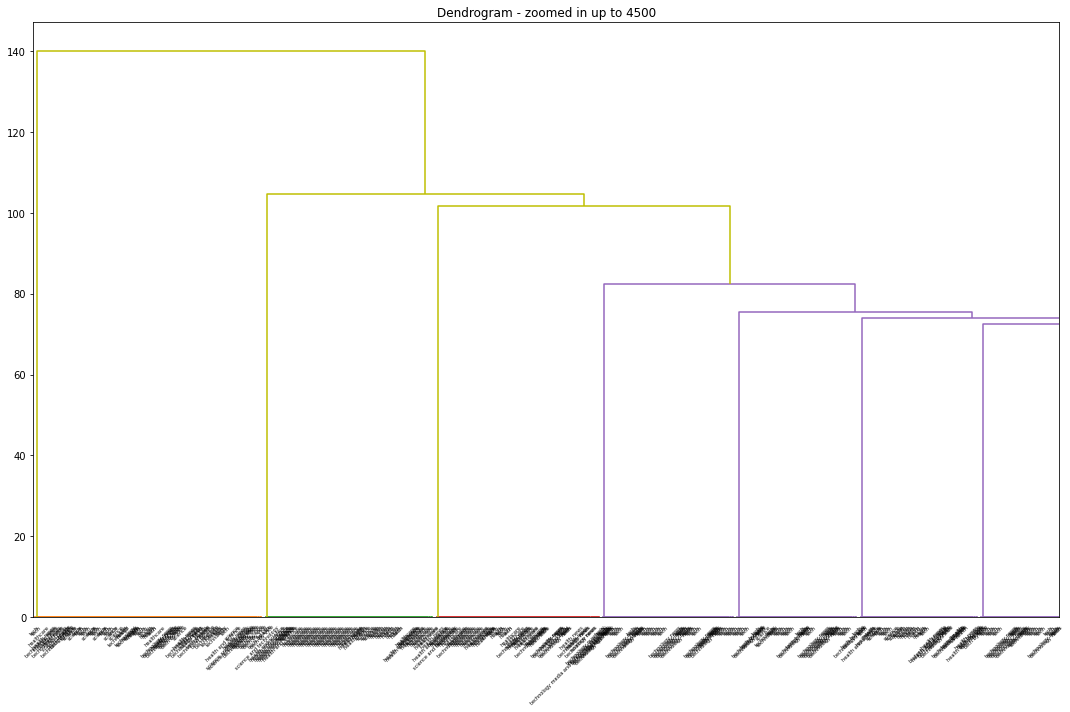

Wall time: 21.5 s


In [77]:
%%time
aux._plot_dendrogram(cos_sim, _labels, zoom_in=True, zoom_xlim=4500)

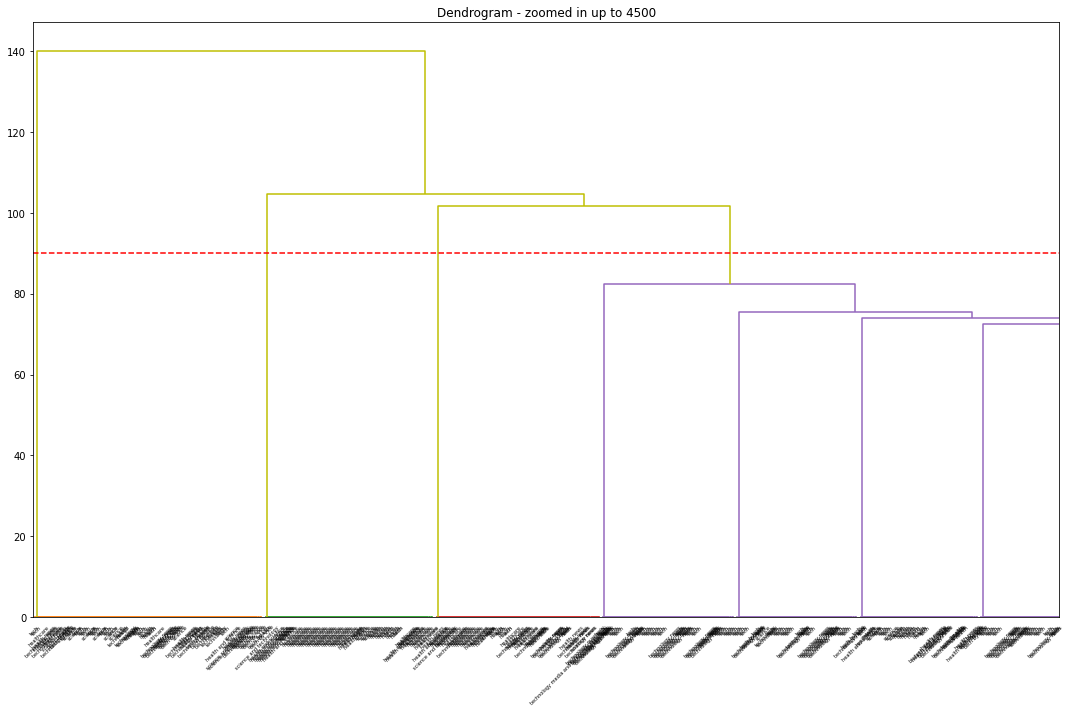

Wall time: 22.4 s


In [79]:
%%time
aux._plot_dendrogram(cos_sim, _labels, zoom_in=True, threshold=90, zoom_xlim=4500)

# Visualization of clusters

In [80]:
%%time
_n_clusters = 4
clusters = aux.clustering(tfidf_matrix, _n_clusters)

Wall time: 109 ms


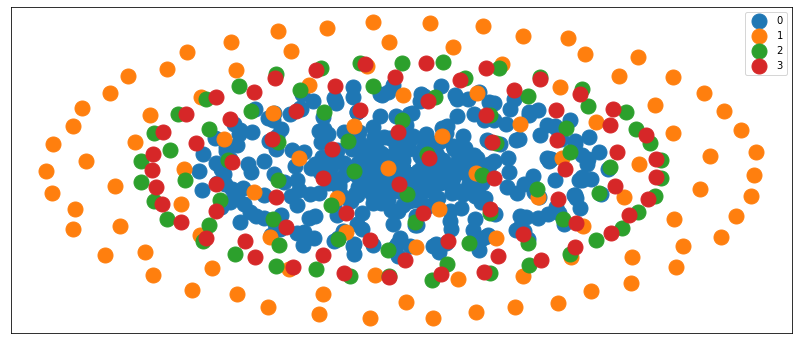

Wall time: 28.5 s


In [81]:
%%time
xs, ys = aux.reduce_dim(cos_sim, rand_state)

df = pd.DataFrame(dict(x=xs, y=ys, segment=clusters, label=_labels, text=_raw_text.values)) 

aux._plot_clusters(df)

In [82]:
print(df.segment.value_counts())
df[df.segment >0]

0    2199
1     101
2      75
3      73
Name: segment, dtype: int64


,x,y,segment,label,text
6,0.025,-0.016,1,tech by vice,new privacy law
14,-0.003,-0.031,1,tech by vice,new image reveals gigantic ropes distant galaxy
38,0.007,-0.022,3,technology news,china ant financial applies singapore digital banking license
47,0.014,0.000,3,health news,china cause mystery pneumonia infecting
64,-0.022,-0.000,3,technology quarterly,china microprocessing value chain microprocessors
65,-0.003,-0.015,3,technology quarterly,china nuclear industry high speed trains world class success stories
66,-0.021,-0.007,3,technology quarterly,future technological progress china technology economist
68,-0.003,0.022,1,science and technology,new physics new particle future physics
69,-0.003,0.023,3,technology quarterly,data china success ai good data technology economist
70,0.022,-0.006,3,technology quarterly,china internal combustion engines cars
